In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import binarize
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import json

fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--3.data.json'
fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--6.data.json'
fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--7.data.json'
fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--8.data.json'
fn = 'RubygemDigger--Steps--GenerateJsonForAllVersions--8.data.json.all.json'
with open(fn) as f:
    data = json.load(f)
    d = data["data"]
    spec = data["spec"]

print(spec)
print(d[0])

n_obs = len(d)
print('nb_records:', n_obs)

{'version': 8, 'description': 'balanced', 'min_number_of_gems': 12, 'min_months': 15, 'min_nloc': 3000, 'min_months_good': 30, 'history_months': 10, 'stopped_time_point': '2015-01-01 00:00:00 UTC', 'ignored_months_for_good': 15}
{'name': 'actionwebservice', 'version': '1.0.0', 'age': 9, 'stat': {'nloc': 5336, 'avg_ccn': 1.7, 'avg_nloc': 7.0, 'avg_token': 37.3, 'fun_count': 588, 'warning_count': 6.371814092953524, 'fun_rate': 0.06, 'nloc_rate': 0.24, 'style_': 57.72113943028486, 'lint_': 12.556221889055472, 'lint_duplicate': 0.1874062968515742, 'metrics_abcsize': 1.4992503748125936, 'metrics_blocklength': 1.1244377811094453, 'metrics_blocknesting': 0.0, 'metrics_classlength': 0.5622188905547226, 'metrics_cyclomaticcomplexity': 0.1874062968515742, 'metrics_linelength': 1.4992503748125936, 'metrics_methodlength': 0.7496251874062968, 'metrics_modulelength': 1.1244377811094453, 'metrics_parameterlists': 0.7496251874062968, 'metrics_perceivedcomplexity': 1.1244377811094453, 'total': 0.749625

In [4]:
df = pd.io.json.json_normalize(d)

old_new_cols = {}
for name in df.columns:
    if name.startswith('stat'):
        old_new_cols[name] = name.split('.')[1]

df.rename(columns=old_new_cols, inplace=True)
df.head()

,age,label,name,Attribute,BooleanParameter,ClassVariable,ControlParameter,DataClump,DuplicateMethodCall,FeatureEnvy,...,metrics_methodlength,metrics_modulelength,metrics_parameterlists,metrics_perceivedcomplexity,nloc,nloc_rate,style_,total,warning_count,version
0,9,good,actionwebservice,4.497751,0.187406,0.0,1.686657,1.311844,35.044978,7.683658,...,0.749625,1.124438,0.749625,1.124438,5336,0.24,57.721139,0.749625,6.371814,1.0.0
1,8,good,actionwebservice,4.313444,0.359454,0.0,1.797268,1.258088,37.203451,7.548526,...,0.898634,1.078361,0.718907,1.258088,5564,0.24,56.254493,1.437815,6.290439,1.1.0
2,7,good,actionwebservice,4.299534,0.358295,0.0,1.791473,1.254031,37.620924,7.524185,...,0.895736,1.074884,0.716589,1.254031,5582,0.24,59.118595,0.179147,6.270154,1.1.2
3,6,good,actionwebservice,4.299534,0.358295,0.0,1.791473,1.254031,37.620924,7.524185,...,0.895736,1.074884,0.716589,1.254031,5582,0.24,59.118595,0.179147,6.270154,1.1.4
4,5,good,actionwebservice,4.299534,0.358295,0.0,1.791473,1.254031,37.620924,7.524185,...,0.895736,1.074884,0.716589,1.254031,5582,0.24,59.118595,0.179147,6.270154,1.1.6


In [5]:
reek_columns =[
 'Attribute',
 'BooleanParameter',
 'ClassVariable',
 'ControlParameter',
 'DataClump',
 'DuplicateMethodCall',
 'FeatureEnvy',
 'InstanceVariableAssumption',
 'IrresponsibleModule',
 'LongParameterList',
 'LongYieldList',
 'ManualDispatch',
 'ModuleInitialize',
 'NestedIterators',
 'NilCheck',
 'PrimaDonnaMethod',
 'RepeatedConditional',
 'SubclassedFromCoreClass',
 'TooManyConstants',
 'TooManyInstanceVariables',
 'TooManyMethods',
 'TooManyStatements',
 'UncommunicativeMethodName',
 'UncommunicativeModuleName',
 'UncommunicativeParameterName',
 'UncommunicativeVariableName',
 'UnusedParameters',
 'UtilityFunction',
 'delta_Attribute',
 'delta_BooleanParameter',
 'delta_ClassVariable',
 'delta_ControlParameter',
 'delta_DataClump',
 'delta_DuplicateMethodCall',
 'delta_FeatureEnvy',
 'delta_InstanceVariableAssumption',
 'delta_IrresponsibleModule',
 'delta_LongParameterList',
 'delta_LongYieldList',
 'delta_ManualDispatch',
 'delta_ModuleInitialize',
 'delta_NestedIterators',
 'delta_NilCheck',
 'delta_PrimaDonnaMethod',
 'delta_RepeatedConditional',
 'delta_SubclassedFromCoreClass',
 'delta_TooManyConstants',
 'delta_TooManyInstanceVariables',
 'delta_TooManyMethods',
 'delta_TooManyStatements',
 'delta_UncommunicativeMethodName',
 'delta_UncommunicativeModuleName',
 'delta_UncommunicativeParameterName',
 'delta_UncommunicativeVariableName',
 'delta_UnusedParameters',
 'delta_UtilityFunction',]
lizard_columns = [
 'avg_ccn',
 'avg_nloc',
 'avg_token',
 'fun_count',
 'fun_rate',
 'nloc_rate',
 'warning_count',
 'delta_avg_ccn',
 'delta_avg_nloc',
 'delta_avg_token',
 'delta_fun_count',
 'delta_fun_rate',
 'delta_warning_count',

]

rubocop_columns = [
 'delta_lint_',
 'delta_lint_duplicate',
 'delta_metrics_abcsize',
 'delta_metrics_blocklength',
 'delta_metrics_blocknesting',
 'delta_metrics_classlength',
 'delta_metrics_cyclomaticcomplexity',
 'delta_metrics_linelength',
 'delta_metrics_methodlength',
 'delta_metrics_modulelength',
 'delta_metrics_parameterlists',
 'delta_metrics_perceivedcomplexity',
 'delta_nloc',
 'delta_nloc_rate',
 'delta_style_',
 'delta_total',
 'lint_',
 'lint_duplicate',
 'metrics_abcsize',
 'metrics_blocklength',
 'metrics_blocknesting',
 'metrics_classlength',
 'metrics_cyclomaticcomplexity',
 'metrics_linelength',
 'metrics_methodlength',
 'metrics_modulelength',
 'metrics_parameterlists',
 'metrics_perceivedcomplexity',
 'style_',
 'total',
 ]

In [6]:
rows_with_NaNs = pd.isnull(df).any(1).nonzero()[0]
print(df.ix[rows_with_NaNs][['name', 'version']])

Empty DataFrame
Columns: [name, version]
Index: []


In [7]:
print(df.shape)
if len(rows_with_NaNs) > 0:
    df.dropna(inplace=True)
    print(df.shape)

(3160, 104)


In [8]:
exclude = ['avg_nloc',] #+lizard_columns + reek_columns
features = [k for k, v in d[0]['stat'].items() if k not in exclude]

X = df[features]
y = (df.label == 'good').values.astype(int)

In [9]:
def label_counts_summary(data, label='unknow'):
    N = len(data)
    N_ones = data.sum()
    print('''
label: {}
nb. of observations: {}
nb. of ones (good gems): {}
frequency: {:.3f}
    '''.format(label, N, N_ones, 1.0 * N_ones / N))

In [10]:
label_counts_summary(y, label='Full set')

# split full dataset into 70% training and 30% test data
# test data is used only to evalute the model's prediction performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

label_counts_summary(y_train, label='Training set')
label_counts_summary(y_test, label='Test set')


label: Full set
nb. of observations: 3160
nb. of ones (good gems): 970
frequency: 0.307
    

label: Training set
nb. of observations: 2212
nb. of ones (good gems): 677
frequency: 0.306
    

label: Test set
nb. of observations: 948
nb. of ones (good gems): 293
frequency: 0.309
    


# Classify using LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))  # % of correct predictions

             precision    recall  f1-score   support

          0       0.79      0.93      0.85       655
          1       0.73      0.43      0.55       293

avg / total       0.77      0.78      0.76       948

0.776371308017


In [12]:
# generate predictions based on classification probability
y_pred_proba = model.predict_proba(X_test)

print(y_pred_proba[:3])

thresh = 0.6
y_pred_good = binarize([y_pred_proba[:,1]], thresh)[0]

print(metrics.accuracy_score(y_test, y_pred_good))

[[  8.28224427e-01   1.71775573e-01]
 [  1.60857145e-03   9.98391429e-01]
 [  9.99826435e-01   1.73565377e-04]]
0.768987341772


## k-fold cross-validation

Split data into 10 blocks and use 1 as testing and 9 others as training. Repeat 10 times with different block as testing block. Good for verifying dependency on outliers.

In [13]:
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean(), scores.std())

[ 0.65822785  0.65506329  0.69620253  0.59493671  0.63924051  0.7943038
  0.70253165  0.66772152  0.66455696  0.69936709]
0.677215189873 0.0495129296598


# Classify using kNN

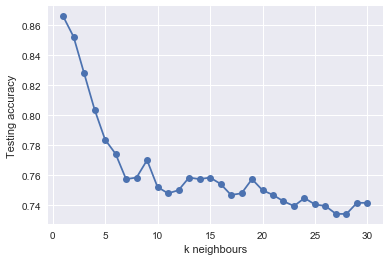

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

nb_range = np.arange(1, 31)
a_scores = []

for nb in nb_range:
    model = KNeighborsClassifier(n_neighbors=nb)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    a_scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(nb_range, a_scores, 'o-')
plt.ylabel('Testing accuracy')
plt.xlabel('k neighbours')

In [15]:
from sklearn.grid_search import GridSearchCV

/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)


# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6474683544303798
{'n_neighbors': 30, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')
